In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

In [3]:
X.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [4]:
X = X.dropna(subset = ["job", "education"])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN


In [5]:
X = X.drop("contact", axis=1)
X = X.drop("poutcome", axis=1)
#axis = 1 significa columna

X.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0


In [6]:
X.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
dtype: int64

In [7]:
datos = X.join(y)
datos

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [8]:
y = datos[["y"]]
y

,y
0,no
1,no
2,no
5,no
6,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [9]:
X = datos.drop("y", axis=1)
X

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0


In [10]:
X = pd.get_dummies(X, columns=["job", "marital"], drop_first=True, dtype=int)
X.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,0,0,0,0,1,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,...,0,0,0,0,0,0,0,0,1,0
5,35,tertiary,no,231,yes,no,5,may,139,1,...,0,1,0,0,0,0,0,0,1,0
6,28,tertiary,no,447,yes,yes,5,may,217,1,...,0,1,0,0,0,0,0,0,0,1


In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [12]:
map_dict = {'primary':1, 'secondary':2, 'tertiary':3}
X["education"] = X["education"].map(map_dict)
X.head()

,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,58,3,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,0,0,0,1,0
1,44,2,no,29,yes,no,5,may,151,1,...,0,0,0,0,0,0,1,0,0,1
2,33,2,no,2,yes,yes,5,may,76,1,...,0,0,0,0,0,0,0,0,1,0
5,35,3,no,231,yes,no,5,may,139,1,...,0,1,0,0,0,0,0,0,1,0
6,28,3,no,447,yes,yes,5,may,217,1,...,0,1,0,0,0,0,0,0,0,1


In [13]:
X = pd.get_dummies(X, columns=["default", "housing", "loan"], drop_first=True, dtype=int)
X.head()

,age,education,balance,day_of_week,month,duration,campaign,pdays,previous,job_blue-collar,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,58,3,2143,5,may,261,1,-1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,44,2,29,5,may,151,1,-1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,33,2,2,5,may,76,1,-1,0,0,...,0,0,0,0,0,1,0,0,1,1
5,35,3,231,5,may,139,1,-1,0,0,...,0,0,0,0,0,1,0,0,1,0
6,28,3,447,5,may,217,1,-1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [14]:
map_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
X["month"] = X["month"].map(map_dict)
X.head()

,age,education,balance,day_of_week,month,duration,campaign,pdays,previous,job_blue-collar,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,58,3,2143,5,5,261,1,-1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,44,2,29,5,5,151,1,-1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,33,2,2,5,5,76,1,-1,0,0,...,0,0,0,0,0,1,0,0,1,1
5,35,3,231,5,5,139,1,-1,0,0,...,0,0,0,0,0,1,0,0,1,0
6,28,3,447,5,5,217,1,-1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((34554, 24), (8639, 24))

In [16]:
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)
y_train.shape, y_test.shape

((34554,), (8639,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

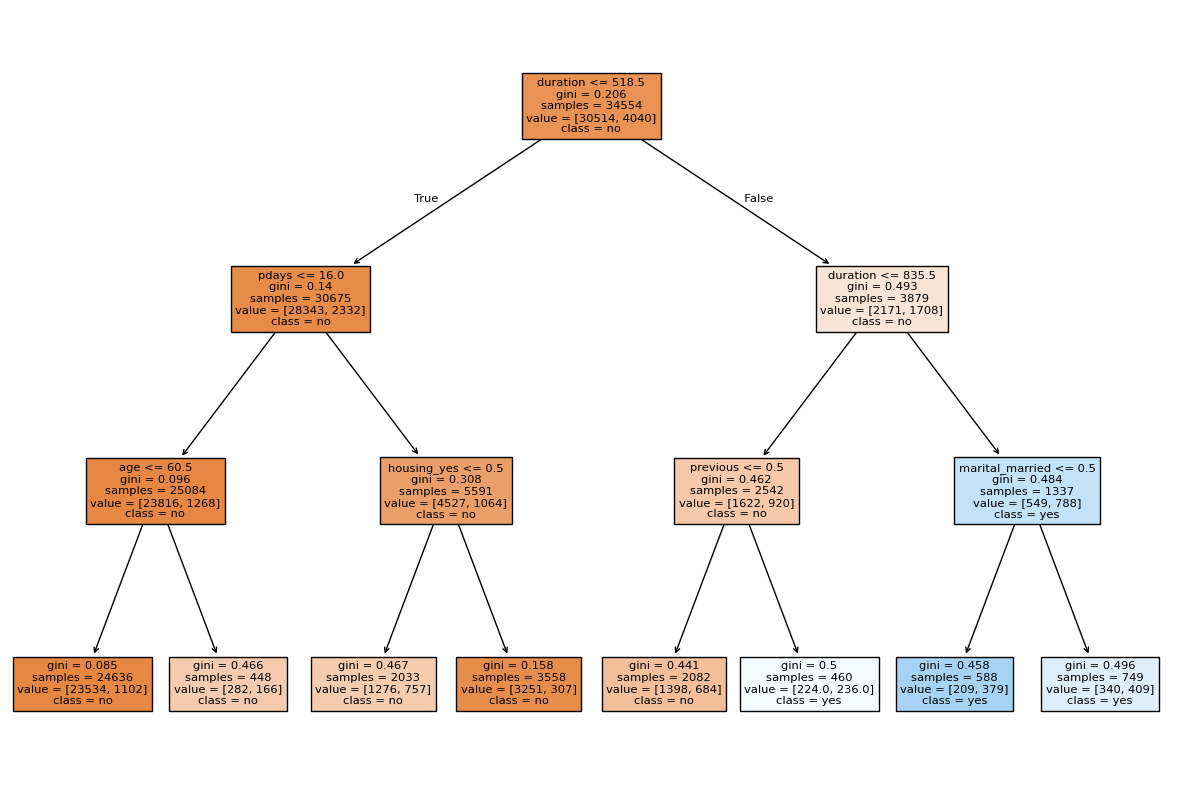

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)

In [30]:
fig.savefig("decision_tree.png")

In [39]:
for name, importance in zip(model.feature_names_in_, model.feature_importances_):
    if(importance > 0):
        print("{:.4f}\t{}".format(importance, name))

0.0614	age
0.6608	duration
0.1175	pdays
0.0169	previous
0.0042	marital_married
0.1393	housing_yes


In [40]:
y_pred = model.predict(X_test)
print("Inferencia (prediccion)!")

Inferencia (prediccion)!


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7464,  194],
       [ 735,  246]])

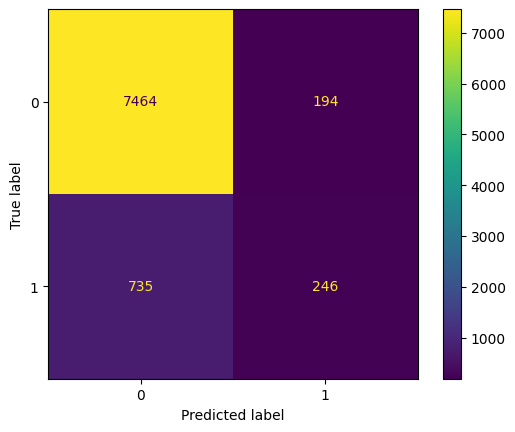

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8924644056025003

In [45]:
X.shape, y.shape

((43193, 24), (43193, 1))

In [46]:
datos = X.join(y)
datos.shape

(43193, 25)

In [47]:
datos_si = datos[datos.y == "yes"]
datos_si.shape

(5021, 25)

In [48]:
datos_no = datos[datos.y == "no"]
datos_no.shape

(38172, 25)

In [49]:
datos_no = datos_no.sample(n = 5021)
datos_no.shape

(5021, 25)

In [50]:
datos = pd.concat([datos_si, datos_no])
datos = datos.reset_index(drop=True)
datos.shape

(10042, 25)

In [51]:
datos.sample(n=15)

,age,education,balance,day_of_week,month,duration,campaign,pdays,previous,job_blue-collar,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,y
1598,24,2,167,18,2,134,2,-1,0,1,...,0,0,0,0,0,1,0,0,1,yes
2055,52,3,193,30,4,381,1,269,1,0,...,0,0,0,0,1,0,0,0,0,yes
5781,38,2,2423,9,6,37,1,-1,0,1,...,0,0,0,0,1,0,0,1,0,no
1974,37,3,72,20,4,885,5,150,7,0,...,0,0,0,0,0,1,0,1,1,yes
4688,34,2,661,5,8,245,2,183,10,0,...,0,0,0,0,0,0,0,1,0,yes
8081,30,1,383,9,5,135,1,-1,0,1,...,0,0,0,0,0,1,0,1,0,no
688,51,2,95,23,7,1309,4,-1,0,0,...,0,0,0,0,1,0,0,1,0,yes
604,33,2,0,17,7,1448,7,-1,0,0,...,0,0,0,0,1,0,0,1,0,yes
7849,30,2,533,2,6,212,1,-1,0,0,...,0,0,0,0,1,0,0,1,0,no
7121,39,3,-1026,26,5,200,2,-1,0,0,...,0,0,0,0,1,0,0,1,0,no


In [52]:
y_new = datos[["y"]]
X_new = datos.drop("y", axis=1)
X_new.shape, y_new.shape

((10042, 24), (10042, 1))

In [53]:
X_train, X_test = train_test_split(X_new, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8033, 24), (2009, 24))

In [55]:
y_train, y_test = train_test_split(y_new, test_size=0.2, random_state=42)

y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)
y_train.shape, y_test.shape

((8033,), (2009,))

In [56]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[818, 181],
       [272, 738]])

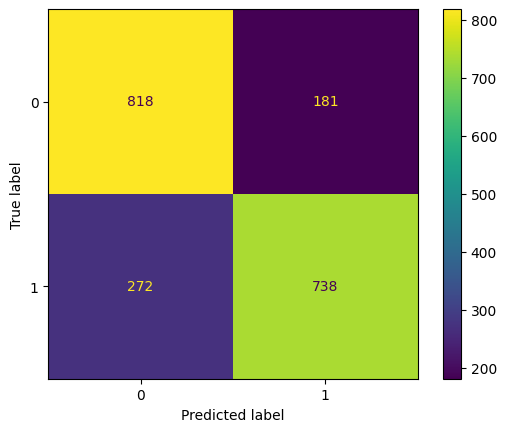

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7745146839223495

### Utilizando GridSearch y Validacion Cruzada

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [69]:
y_new = np.ravel(y_new)

In [70]:
#Lista de hiper-parametros a probar (la libreria se encarga de combinarlos)
param_grid = [
    {'max_depth': [2, 3, 5, 10],
     'min_samples_leaf': [10, 25, 50],
     'criterion': ['gini', 'entropy']
    }
]

#Configurar el modelo a utilizar, junto con su lista de hiper-params
model = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
model.fit(X_new, y_new)

#Validacion cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True)

accuracy = cross_val_score(model, X_new, y_new, cv=cv, scoring="balanced_accuracy")
print("Mejor modelo:", round(np.mean(accuracy), 3))
print("Mejor hiper-param conf.", model.best_params_)

Mejor modelo: 0.81
Mejor hiper-param conf. {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}


In [71]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X_new, y_new, cv=cv)
cm = confusion_matrix(y_new, y_pred)
cm

array([[3917, 1104],
       [ 751, 4270]])

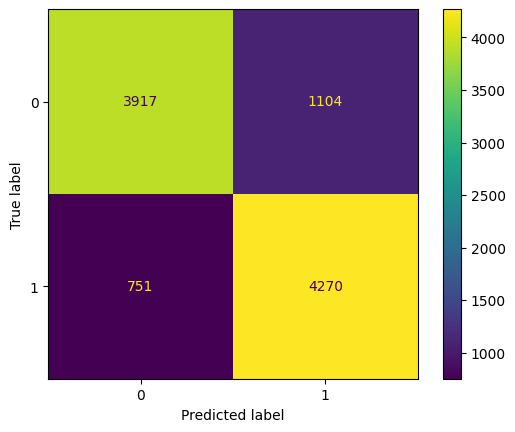

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [73]:
accuracy = accuracy_score(y_new, y_pred)
accuracy

0.8152758414658434

In [74]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))